Price Prediction Model 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("D:\\Machine Learning\\Data sets\\laptop_price.csv",encoding="latin1")

In [3]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [4]:
# they are updated 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Data Cleaning on Ram Weight 

In [5]:
# remove unnecessary columns from data frame 
df.drop(columns=["laptop_ID"],inplace=True)

In [6]:
# remove kg and convert in numeric data Weight column 
df["Weight"]=df["Weight"].str.replace("kg"," ").str.strip()


In [7]:
# convert the data type
df["Weight"]=pd.to_numeric(df["Weight"])

In [8]:
# checking for Nan values
df["Weight"].isna().sum()

np.int64(0)

In [9]:
# data cleaning on Ram 
# remove GB from Ram and convert in numeric data 
df["Ram"]=df["Ram"].str.replace("GB"," ")
df["Ram"]=df["Ram"].astype(int)

Exploratory Data Analysis 

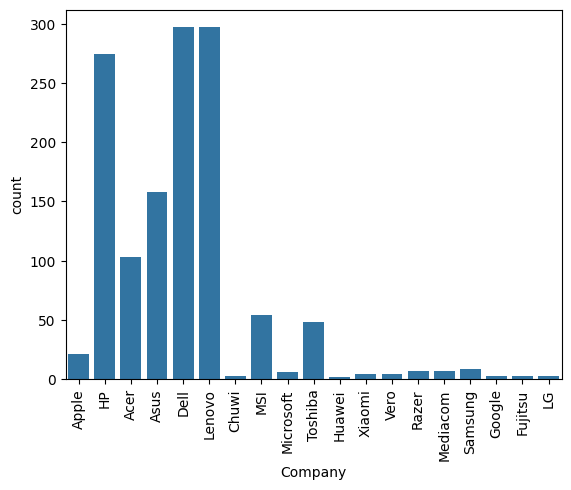

In [10]:
# CHECK HOW MANY COMAPANIES WE HAVE 
df["Company"].nunique()
sns.countplot(x=df["Company"])
plt.xticks(rotation=90)
plt.show()




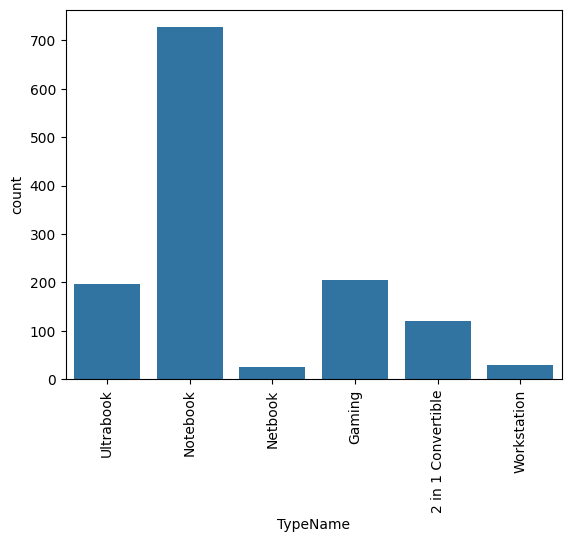

In [11]:
sns.countplot(x=df["TypeName"])
plt.xticks(rotation=90)
plt.show()

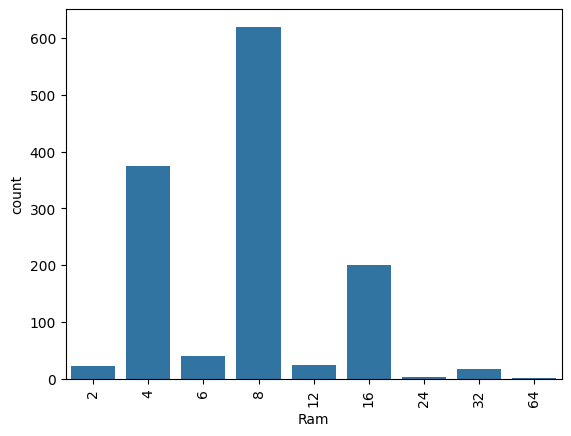

In [12]:
sns.countplot(x=df["Ram"])
plt.xticks(rotation=90)
plt.show()

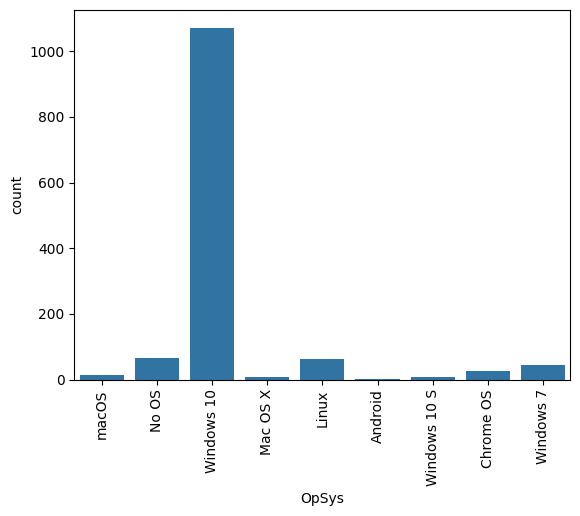

In [13]:
sns.countplot(x=df["OpSys"])
plt.xticks(rotation=90)
plt.show()

Conclusion 
1) hp dell lenevo acer asus have large number of laptops 
2) 8gb ram have high peak among people
3) windows like window 10 have maximum users 


Bivarient Analysis 

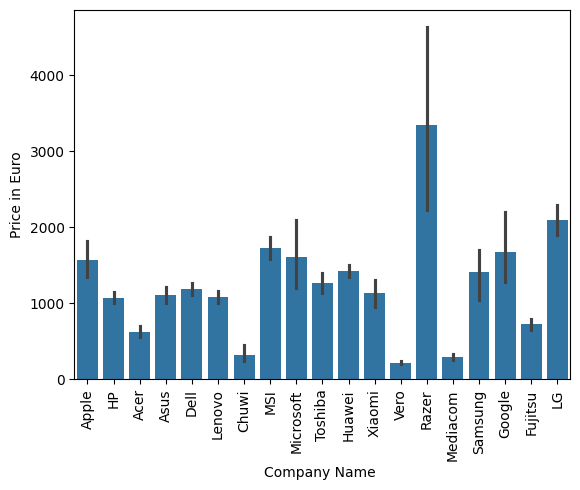

In [14]:
# compare the prices with each company name 

sns.barplot(x=df["Company"],y=df["Price_euros"])
plt.xticks(rotation=90)
plt.xlabel("Company Name ")
plt.ylabel("Price in Euro")
plt.show()

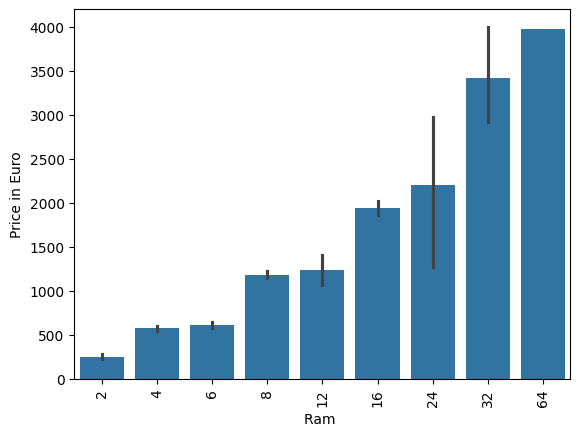

In [15]:
sns.barplot(x=df["Ram"],y=df["Price_euros"])
plt.xticks(rotation=90)
plt.xlabel("Ram ")
plt.ylabel("Price in Euro")
plt.show()

Target Column (Price) Analysis

In [16]:
# change name of price col 
df=df.rename(columns={"Price_euros":"price"})

In [17]:
df["price"].describe()

count    1303.000000
mean     1123.686992
std       699.009043
min       174.000000
25%       599.000000
50%       977.000000
75%      1487.880000
max      6099.000000
Name: price, dtype: float64

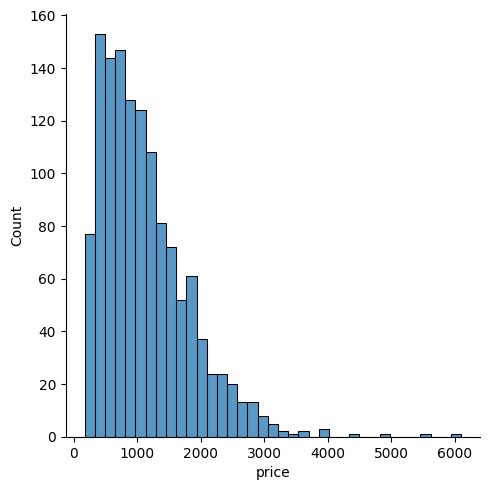

In [18]:
sns.displot(df["price"])

<Axes: xlabel='price', ylabel='Density'>

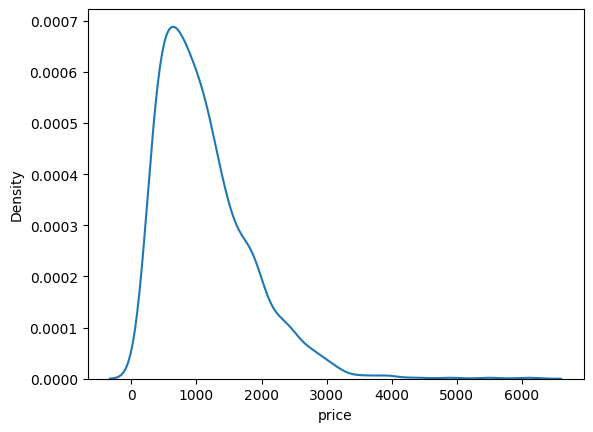

In [19]:
# DATA DISTRIBUTION 
sns.kdeplot(df["price"])

Data is skewed Apply Log Transformation to achieve Normal Distribution of data 

In [20]:
df["price"] = np.log(df["price"])

<Axes: xlabel='price', ylabel='Density'>

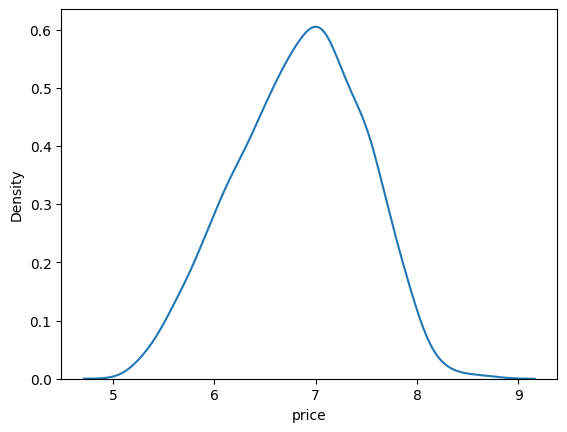

In [21]:
sns.kdeplot(df["price"])

In [22]:
df["price"].describe()

count    1303.000000
mean        6.839173
std         0.623841
min         5.159055
25%         6.395262
50%         6.884487
75%         7.305107
max         8.715880
Name: price, dtype: float64

In [23]:
df.describe()

,Inches,Ram,Weight,price
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,6.839173
std,1.426304,5.084665,0.665475,0.623841
min,10.100000,2.000000,0.690000,5.159055
25%,14.000000,4.000000,1.500000,6.395262
50%,15.600000,8.000000,2.040000,6.884487
75%,15.600000,8.000000,2.300000,7.305107
max,18.400000,64.000000,4.700000,8.715880


Data Cleaning on Catogorial Columns

In [24]:
# check no of unique companies 

df["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

Dell Hp Lennovo Accer Asus are in top 5 remaining are in other companies due to less no of products 

In [25]:
top = ["Dell","Lenovo","HP","Asus","Acer"]
df["Company"]=df["Company"].apply(lambda x : x if x in top else  "other" )

Data analysis on Operating Systems 

In [26]:
# CHANGE COL NAME 
df.rename(columns={"OpSys":"operating system"},inplace=True)

In [27]:
df["operating system"].nunique()

9

In [28]:
df["operating system"].value_counts()

operating system
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   operating system  1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  price             1303 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 122.3+ KB


In [30]:
df["operating system"].value_counts()

operating system
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [31]:
df["operating system"]=df["operating system"].apply( lambda x :"Windows" if  "Windows" in x  else "Linux" if x=="Linux" else "No OS" if x=="No OS" else "Other" )

In [32]:
df["operating system"].value_counts()

operating system
Windows    1125
No OS        66
Linux        62
Other        50
Name: count, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   operating system  1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  price             1303 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 122.3+ KB


In [34]:
new_data = df.copy()


In [35]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   operating system  1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  price             1303 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 122.3+ KB


Data cleaning on Type name 

In [36]:
new_data["TypeName"].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [37]:
# workstation and netbook are in less demand so cap in other 
new_data["TypeName"]=new_data["TypeName"].apply(lambda x :"Notebook" if x=="Notebook" else "Gaming" if x=="Gaming" else "Ultrabook" if x=="Ultrabook" else "2 in 1 Convertible" if x=="2 in 1 Convertible" else "Other" )

In [38]:
new_data["TypeName"].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Other                  54
Name: count, dtype: int64

In [39]:
full_data = new_data.copy()
# backup copy for others models 

In [40]:
new_data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'operating system', 'Weight', 'price'],
      dtype='object')

Initial Results:
 
company product typename weight ram are full and final ready for model
 
target columns price 

In [41]:
# extract inputs and outputs cols for initial model 
# DROP UN NECESSARY COLUMNS 
new_data.drop(columns=["Inches","ScreenResolution","Cpu","Memory","Gpu","Product"],inplace=True)



In [42]:
# fetch input and output columns 
y=new_data.iloc[:,5:6]


In [43]:
# DROP TARGET COL FROM INPUT COL 
new_data.drop(columns=["price"],inplace=True)

In [44]:
new_data


,Company,TypeName,Ram,operating system,Weight
0,other,Ultrabook,8,Other,1.37
1,other,Ultrabook,8,Other,1.34
2,HP,Notebook,8,No OS,1.86
3,other,Ultrabook,16,Other,1.83
4,other,Ultrabook,8,Other,1.37
...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30
1300,Lenovo,Notebook,2,Windows,1.50
1301,HP,Notebook,6,Windows,2.19


Columns Transformation 

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf = ColumnTransformer ([("t1",OneHotEncoder(sparse_output=False,drop="first"),[0,1,3])],remainder="passthrough")
i = trf.fit_transform(new_data) 

Ready for Model 

Descision Tree 

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(i,y,random_state=6,test_size=0.1)
tr = DecisionTreeRegressor()
tr.fit(x_train,y_train)
p = tr.predict(x_test)
scores = r2_score(y_test,p)
print("Highest r2 score : ",scores)



Highest r2 score :  0.8735580194407233


Lasso(alpha=1.5)

As we acheive highest r2 score from decision tree  = 0.87 at random_state = 6

I have checked through Loops 

